# TfIdf-Clusters-Ngram+LDA

In [4]:
# Install
#!pip install -r requirements.txt
#pip install numpy==1.20.0
#pip install pandas
#pip install yellowbrick

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data

In [239]:
# Importing prepared dataset
import pickle
input = open('my_corpus-21-sql.pql', 'rb')
obj = pickle.load(input)
input.close()

txt = obj['txt']
corpus = obj['corpus']
all_words = obj['all_words']
print(corpus[1])

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


світовий пандемія принести невизначеність вимушений реагувати надшвидко маючи право помилка бізнес винаходити модель благодійний адаптуватися кризовий умова пропонуючи підхід рішення проєкт травень директорка виступити віртуальний саміт благодійництво тема фандрайзинг специфіка ковіднога долучитися дискусіїй секція благодійник бізнес адаптивність криза запрошувати прийняти саміт участь безкоштовний реєстрація посилання


In [240]:
txt.reset_index(drop=True,inplace=True)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,like,love,haha,wow,sad,angry
0,"Заходи (завдання), які виконані в зоні (районі...",2.0,0.0,0.0,0.0,0.0,0.0
1,Світова пандемія принесла невизначеність у сус...,0.0,0.0,0.0,0.0,0.0,0.0
2,За добу в Польщі померло понад 800 людей від к...,1.0,0.0,0.0,0.0,0.0,0.0
3,"Мене часто питають, а як зробити інакше. Ось я...",1.0,3.0,0.0,0.0,0.0,0.0
4,Президент України Володимир Зеленський підписа...,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2847,"очуміти ,нічому людей ані ковід, ані війна , а...",1.0,0.0,0.0,1.0,0.0,0.0
2848,Зеленський і «Слуги народу» намагаються втюхат...,97.0,0.0,0.0,0.0,14.0,0.0
2849,"У час, коли над Україною нависла загроза прямо...",52.0,2.0,0.0,0.0,0.0,0.0
2850,Вчора під час ефіру на «Свободі слова» звернул...,160.0,7.0,0.0,0.0,1.0,2.0


In [7]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.001, use_idf=True, ngram_range=(1,3))
                            #max_df=0.8, max_features=10000
tfidf_matrix = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()

# K-Means

In [8]:
#!pip install clusteval

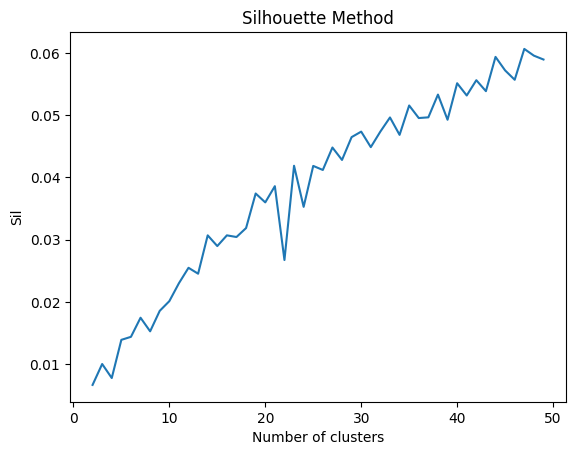

2:0.006709263439817583
3:0.010066003041015594
4:0.007814693416252952
5:0.013942977922080052
6:0.014426960652231612
7:0.0174926006381585
8:0.01530994922738523
9:0.018596218183774917
10:0.020149179356511702
11:0.0230273249759669
12:0.025504894830783817
13:0.024557534739365044
14:0.030711280905675018
15:0.028992198923065607
16:0.030711276049541596
17:0.0304440660729517
18:0.03188167265629241
19:0.03742747038647063
20:0.03600097741910618
21:0.038602328687314606
22:0.026751660639879497
23:0.04187714134040984
24:0.03528482978288164
25:0.041854583755626965
26:0.04120340991927541
27:0.044807084818086415
28:0.042812466251688004
29:0.04647400901945053
30:0.04735754774028599
31:0.04486751268833131
32:0.04736972335988324
33:0.04963070042543519
34:0.04683538069926142
35:0.05155059835248175
36:0.04953662976718712
37:0.04964832726187832
38:0.05330083329487665
39:0.04926246138804991
40:0.05512117744165295
41:0.05315606540693205
42:0.05561011174581841
43:0.05384826830272861
44:0.05934912944695775
45:0.

In [9]:
# Silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []

for K in range(2, 50):
  kmeans = KMeans(n_clusters = K).fit(tfidf_matrix)  
  preds = kmeans.fit_predict(tfidf_matrix)
  sil.append(silhouette_score(tfidf_matrix, preds, metric = 'euclidean'))


plt.plot(range(2, 50), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [50]:
# Number of Clusters
k = 9

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# K-means clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters = k)
km.fit(tfidf_matrix)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 9.22 s


### Clusters descriptions

In [258]:
def descriptions(name, labels):
    # Reactions
    txt[name] = labels
    print(txt.groupby(name).mean().round())
    print('\n')
        
    posts = { 'corpus': corpus, 'cluster': labels }
    posts = pd.DataFrame(posts)
    words_from_clusters = posts.groupby(['cluster'])['corpus'].apply(lambda x: "%s" % ' '.join(x))
    
    names = []
    for cluster in words_from_clusters:
            words_freq = FreqDist(cluster.split(' '))
            names.append(words_freq.most_common(1)[0][0])
            print('Cluster: ', cluster.title)
            print('Most popular words: ', words_freq.most_common(10))
            print('Total number of unique words: ', len(words_freq))
            print('\n')
            
    # Clusters cores
    cores = pd.DataFrame({'names':names})
    cores['shares'] = (posts.groupby(['cluster']).count()/len(labels)*100).round(2)
    print(cores)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
descriptions('kmeans', km.labels_.tolist())


C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        like  love  haha  wow  sad  angry
kmeans                                   
0       73.0   2.0   3.0  1.0  1.0    2.0
1       70.0   2.0   6.0  1.0  6.0    9.0
2        1.0   0.0   1.0  0.0  0.0    0.0
3       90.0   5.0   6.0  1.0  4.0    5.0
4       69.0   1.0   4.0  2.0  6.0   13.0
5       32.0   1.0   6.0  1.0  1.0    2.0
6        7.0   0.0   0.0  0.0  0.0    0.0
7        8.0   0.0   0.0  0.0  0.0    0.0
8       65.0   3.0   6.0  1.0  2.0    5.0


Cluster:  <built-in method title of str object at 0x0000017E8D189040>
Most popular words:  [('вакцина', 649), ('здоров', 519), ('охорона', 377), ('медичний', 354), ('вакцинація', 342), ('випадок', 322), ('вірус', 307), ('допомога', 279), ('захід', 254), ('населення', 231)]
Total number of unique words:  9408


Cluster:  <built-in method title of str object at 0x0000017EA7B55AB0>
Most popular words:  [('бізнес', 467), ('робот', 226), ('допомога', 221), ('бюджет', 207), ('економіка', 188), ('державний', 181), ('влад', 170), ('питанн

## LDA

In [96]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = k,           # Number of topics
                                      max_iter = 20,               # Max learning iterations
                                      random_state = 100,          # Random state
                                      batch_size = 128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(tfidf_matrix)

# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(tfidf_matrix))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(tfidf_matrix))

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Log Likelihood:  -295022.64493746334
Perplexity:  218172.10131299653


Some words for agenda can be picked up on this stage

In [97]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,навчальний,вчитель,раша,раша пандемія,війнути,грузія,чесний,сильний,регіональний,спорт
Topic 1,говоритьвеликийльвів,токшоу,токшоу епідемія,політик слуганарід,політик слуганарід парламент,токшоу епідемія політик,говоритьвеликийльвів токшоу,парламент телеканалнт,епідемія політик слуганарід,епідемія політик
Topic 2,епіцентр,краса,маска,цінник,квіточка,можно,маска супермаркет,доставка вантаж,епіцентр маска супермаркет,мережа епіцентр маска
Topic 3,режим,режим надзвичайний,пандемия,справитися громадянський,пандемія русский,русский міра справитися,міра справитися,пандемія русский міра,міра справитися громадянський,русский
Topic 4,тест,травень,вакцина,обмеження,допомога,пандемія,здоров,вакцинація,міністр,робот
Topic 5,чома,гальмувати,пол1цейський,пол1цейський диктатура,диктатура,поскаржитися,інстинкт,рівність,треба,проаналізувати ситуація
Topic 6,адаптивний,серпень,шмигаль,матеріальний виплата,перти,день незалежність,загальнодержавний,задуматися,найман працівник,найман
Topic 7,обмежувати українець виїзд,обмежувати українець,українець виїзд,ухвалити рішення послаблення,рішення послаблення,послаблення дізнатися,рішення послаблення дізнатися,дізнатися правило перевірити,дізнатися правило,правило перевірити 3fla6wv
Topic 8,гончаренко,відставка,олексій гончаренко,маска деталь,маска деталь читати,ходити маска деталь,деталь читати,ковідомор,кіпр,ходити маска


### LDA Visualizing

In [18]:
#!pip install pyldavis

In [111]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, tfidf_matrix, vectorizer, mds='tsne')
panel

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      111.092506 -133.722946       1        1  57.930886
0       34.946613  107.064590       2        1   9.486498
1      -28.088213 -159.949036       3        1   5.585166
3      147.698074   21.369604       4        1   5.436366
6      -97.501183  126.981384       5        1   5.376008
5       30.312096  -32.794945       6        1   4.995415
2     -155.443665 -118.494690       7        1   3.942119
8     -204.248108   22.596130       8        1   3.860874
7      -79.404678   -6.864717       9        1   3.386668, topic_info=              Term       Freq      Total Category  logprob  loglift
32264        режим   7.000000   7.000000  Default  30.0000  30.0000
38063         тест  28.000000  28.000000  Default  29.0000  29.0000
18695        маска  16.000000  16.000000  Default  28.0000  28.0000
42407      шмигаль   8.000000   8.000000  Default  27.0000  27.0000
41959         чома   8.000000   8.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
28972      правило   0.263695   8.679678   Topic9  -8.0334  -0.1086
33965      рішення   0.235987  12.257376   Topic9  -8.1444  -0.5648
39370    українець   0.237694  17.130472   Topic9  -8.1372  -0.8923
14217       зелень   0.165736   1.618225   Topic9  -8.4978   1.1066
26841  повідомляти   0.163454   2.561707   Topic9  -8.5117   0.6334

[425 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
190        1  0.600490  адаптивний
190        5  0.300245  адаптивний
895        2  1.103800     ахметов
2078       1  0.993308      бізнес
2356       1  0.993578     вакцина
...      ...       ...         ...
42407      5  0.122750     шмигаль
42959      2  1.128770        якби
43035      1  0.972189        якщо
43819      1  0.774876    інститут
43819      2  0.258292    інститут

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 7, 6, 3, 9, 8])

### Saving results

In [112]:
p = pyLDAvis.sklearn.prepare(lda_model, tfidf_matrix, vectorizer, mds='tsne')
pyLDAvis.save_html(p, 'lda-21.html')

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LDA-K-means

In [117]:
# K-means clustering
kmLDA = KMeans(n_clusters = k)
kmLDA.fit(lda_output)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [260]:
descriptions('kmLDA', kmLDA.labels_.tolist())

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        like  love  haha  wow  sad  angry  kmeans
kmLDA                                            
0       62.0   3.0   5.0  1.0  3.0    5.0     4.0
1       58.0   1.0   2.0  1.0  5.0    3.0     5.0
2       73.0   1.0   0.0  0.0  1.0    0.0     5.0
3       67.0   1.0   3.0  1.0  3.0    7.0     5.0
4       93.0   1.0  12.0  1.0  2.0    4.0     5.0
5       83.0   2.0  13.0  1.0  2.0    3.0     3.0
6       88.0   8.0   8.0  1.0  2.0    2.0     4.0
7      268.0  23.0  15.0  3.0  5.0   20.0     5.0
8       15.0   0.0   1.0  0.0  1.0    0.0     4.0


Cluster:  <built-in method title of str object at 0x0000017EA9FD6040>
Most popular words:  [('допомога', 716), ('вакцина', 709), ('тест', 696), ('питання', 671), ('вірус', 657), ('здоров', 641), ('травень', 635), ('робот', 612), ('захід', 578), ('міністр', 573)]
Total number of unique words:  26762


Cluster:  <built-in method title of str object at 0x0000017EA7C5A3E0>
Most popular words:  [('тест', 151), ('проєкт', 96), ('система', 87), ('інст

## LDA AgglomerativeClustering

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


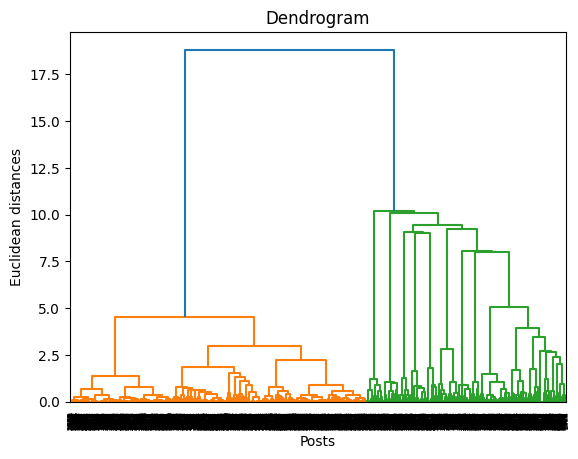

In [105]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(lda_output, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Posts')
plt.ylabel('Euclidean distances')
plt.show()

In [122]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward').fit_predict(lda_output)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [262]:
descriptions('agLDA', hc)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        like  love  haha  wow  sad  angry  kmeans  kmLDA
agLDA                                                   
0       33.0   1.0   3.0  1.0  3.0    3.0     5.0    2.0
1       66.0   3.0   5.0  1.0  3.0    5.0     4.0    0.0
2       82.0   2.0  13.0  1.0  3.0    3.0     3.0    5.0
3      291.0  25.0  12.0  3.0  5.0   22.0     5.0    7.0
4      101.0   9.0   9.0  1.0  2.0    2.0     4.0    6.0
5      119.0   1.0  16.0  1.0  3.0    5.0     5.0    4.0
6       82.0   2.0   0.0  0.0  1.0    0.0     5.0    2.0
7       82.0   1.0   3.0  1.0  3.0    9.0     5.0    3.0
8       81.0   1.0   0.0  1.0  6.0    4.0     4.0    1.0


Cluster:  <built-in method title of str object at 0x0000017EA7B55AB0>
Most popular words:  [('міністр', 129), ('обмеження', 121), ('тест', 116), ('здоров', 114), ('закон', 108), ('захід', 105), ('травень', 103), ('українець', 103), ('допомога', 103), ('український', 94)]
Total number of unique words:  7387


Cluster:  <built-in method title of str object at 0x0000017E8

## HDBSCAN

In [145]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=24)
hdb.fit(tfidf_matrix)
len(set(hdb.labels_))

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\kater\anaconda3\envs\covid\lib\site-packages\hdbscan\hdbscan_.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  condensed_tree = condense_tree(single_linkage_tree,
C:\User

9

In [264]:
descriptions('hdb', hdb.labels_)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      like  love  haha  wow  sad  angry  kmeans  kmLDA  agLDA
hdb                                                          
-1    58.0   2.0   4.0  1.0  3.0    5.0     4.0    1.0    1.0
 0     4.0   0.0   1.0  1.0  3.0    1.0     3.0    4.0    3.0
 1    60.0   1.0   6.0  0.0  0.0    1.0     5.0    2.0    3.0
 2   159.0   8.0  14.0  1.0  1.0    1.0     6.0    4.0    4.0
 3    65.0   2.0  20.0  1.0  1.0    1.0     5.0    4.0    3.0
 4   337.0  32.0   8.0  1.0  2.0    4.0     3.0    3.0    4.0
 5     2.0   0.0   0.0  0.0  0.0    0.0     4.0    4.0    4.0
 6   217.0   9.0  16.0  1.0  5.0    5.0     4.0    3.0    3.0
 7     9.0   1.0   0.0  0.0  0.0    0.0     3.0    3.0    3.0


Cluster:  <built-in method title of str object at 0x0000017EA9FD8040>
Most popular words:  [('допомога', 865), ('тест', 841), ('вакцина', 823), ('здоров', 739), ('робот', 711), ('травень', 695), ('міністр', 694), ('питання', 684), ('захід', 673), ('вірус', 664)]
Total number of unique words:  27922


Cluster:  <bui

## UMAP

In [33]:
#!pip install umap-learn

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
import umap
mapper = umap.UMAP(n_neighbors=15, min_dist=0.15, n_components=2).fit(tfidf_matrix)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
#!pip install datashader
#!pip install bokeh 
#!pip install holoviews 
#!pip install scikit-image
#!pip install colorcet

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


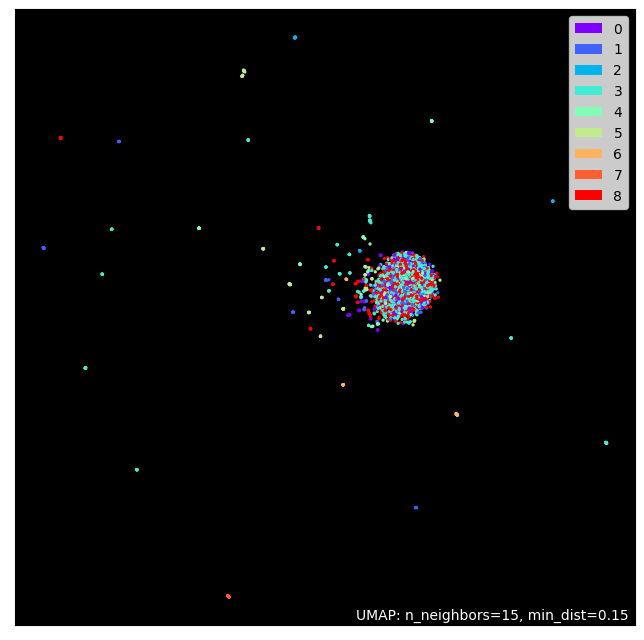

In [74]:
import umap.plot
umap.plot.points(mapper, labels=np.array(txt.kmeans), theme='fire')
#plt.legend(loc=2)
umap.plot.plt.show()

## UMAP+DBSCAN

In [75]:
reducer = umap.UMAP(n_neighbors = 15, min_dist = 0.15, n_epochs=5000)
X_umap = reducer.fit_transform(tfidf_matrix)
umap_cl = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10).fit(X_umap)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-1  8  8 ...  8  8  8]


C:\Users\kater\anaconda3\envs\covid\lib\site-packages\hdbscan\hdbscan_.py:275: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alg = KDTreeBoruvkaAlgorithm(tree, min_samples, metric=metric,
C:\Users\kater\anaconda3\envs\covid\lib\site-packages\hdbscan\hdbscan_.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more deta

In [269]:
descriptions('umap', umap_cl.labels_)

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       like  love  haha  wow  sad  angry  kmeans  kmLDA  agLDA  hdb
umap                                                               
-1    123.0   6.0  12.0  1.0  3.0    5.0     4.0    3.0    3.0  1.0
 0      8.0   0.0   0.0  0.0  0.0    0.0     7.0    0.0    1.0  6.0
 1      6.0   0.0   2.0  1.0  4.0    1.0     5.0    4.0    5.0  1.0
 2     12.0   1.0   1.0  0.0  0.0    0.0     4.0    3.0    2.0  2.0
 3    258.0  18.0   7.0  0.0  5.0    4.0     3.0    4.0    4.0  2.0
 4    126.0   6.0  14.0  9.0  7.0   76.0     4.0    5.0    2.0 -0.0
 5     66.0   0.0   1.0  0.0  0.0    0.0     6.0    4.0    5.0 -0.0
 6     74.0   1.0   6.0  1.0  2.0    3.0     2.0    4.0    2.0  0.0
 7     34.0   1.0   1.0  0.0  1.0    1.0     4.0    1.0    1.0 -0.0
 8     59.0   3.0   4.0  1.0  3.0    5.0     4.0    1.0    1.0 -1.0


Cluster:  <built-in method title of str object at 0x0000017E8D185040>
Most popular words:  [('тест', 286), ('допомога', 261), ('здоров', 226), ('українець', 226), ('український', 221

In [76]:
def plot_2d(X, label_list_cluster):
    plt.figure(figsize=(7, 7))
    plt.subplots_adjust(bottom=0.1)
    c = label_list_cluster
    plt.scatter(X[:, 0], X[:, 1], c=c, cmap='rainbow', label='True Position')
    plt.show()

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


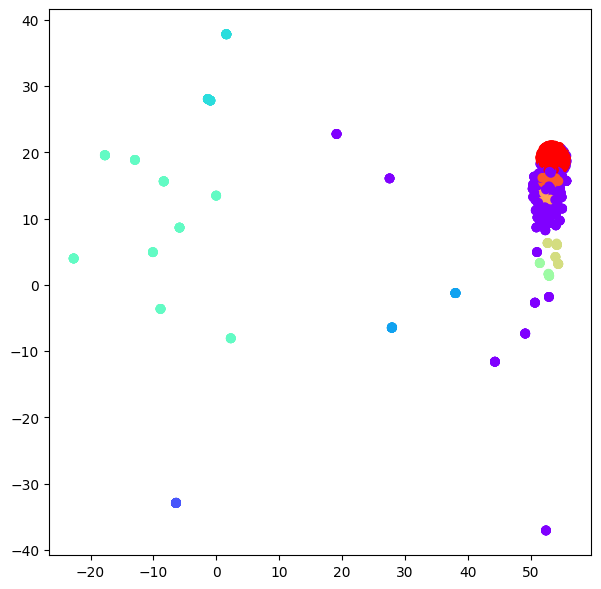

In [77]:
plot_2d(X_umap,umap_cl.labels_)

# Pickle

In [271]:
import pickle

obj = {'txt': txt}
output = open('tfidf-clusters.pql', 'wb')
pickle.dump(obj, output, 2)
output.close()

C:\Users\kater\anaconda3\envs\covid\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
